In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import normaltest
from scipy.stats import shapiro
# from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.display.float_format = '{:,.3f}'.format
import numpy as np, scipy.stats as st
from functions import count_residuals, stat_intervals, out_N_obs, are_medium_outliers, stat_intervals2 #import custom functions

In [2]:
data = pd.read_excel("Generater_data2.xlsx", index_col=0)

In [3]:
data.head(10)

,Y,X,X_10p,Out_10,X_20p,Out_20,X_30p,Out_30
0,5.630,9.738,9.738,0,20.800,1,9.738,0
1,4.821,7.680,7.680,0,7.680,0,0.600,1
2,5.823,7.656,7.656,0,7.656,0,7.656,0
3,6.938,10.153,10.153,0,10.153,0,4.600,1
4,4.699,8.056,8.056,0,2.600,1,8.056,0
5,4.699,6.885,6.885,0,6.885,0,6.885,0
6,7.010,11.174,11.174,0,1.800,1,11.174,0
7,5.975,11.010,1.800,1,1.000,1,17.000,1
8,4.399,8.802,8.802,0,8.802,0,8.802,0
9,5.689,10.057,10.057,0,15.000,1,1.200,1


In [4]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).mean()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [5]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [6]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "mean":average})

In [7]:
mead_df = pd.DataFrame(flat_data)

In [8]:
mead_df.to_excel("Redids_0_mean.xlsx")

In [9]:
mead_df = mead_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

In [10]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).max()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [11]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [12]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "max":average})

In [13]:
max_df = pd.DataFrame(flat_data)

In [14]:
max_df.to_excel("Redids_0_max.xlsx")

In [15]:
max_df = max_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

In [16]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).min()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [17]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [18]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "min":average})

In [19]:
min_df = pd.DataFrame(flat_data)
# min_df

In [20]:
min_df.to_excel("Redids_0_min.xlsx")

In [21]:
min_df = min_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')
min_df

min                            
size                  20     30     50     100    1000
residual                                              
deleted_studentized -2.219 -2.268 -2.423 -2.617 -3.359
standardized        -1.873 -2.028 -2.250 -2.511 -3.338
studentized         -1.973 -2.096 -2.296 -2.536 -3.341

In [22]:
# a.set_index(['size', 'residual']).sort_index().unstack(level = 'size')

In [23]:
from seaborn import heatmap
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Средние значения стандартизованных остатков')

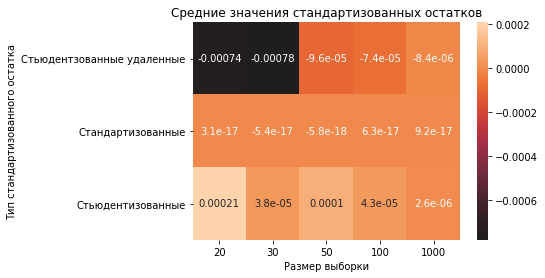

In [24]:
heatmap(mead_df, center=mead_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['Стьюдентзованные удаленные', 'Стандартизованные', 'Стьюдентизованные'])
plt.xlabel("Размер выборки")
plt.ylabel("Тип стандартизованного остатка")
plt.title("Средние значения стандартизованных остатков")

Text(0.5, 1.0, 'Усредненные значения максимальных значений\nстандартизованных остатков')

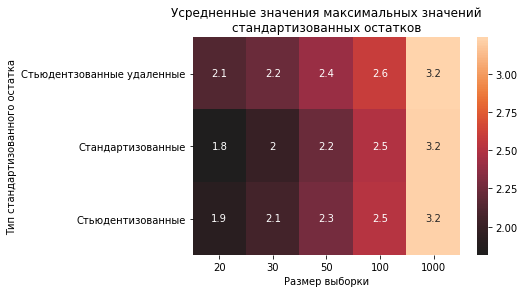

In [25]:
heatmap(max_df, annot=True, center=max_df.min().min(),
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['Стьюдентзованные удаленные', 'Стандартизованные', 'Стьюдентизованные'])
plt.xlabel("Размер выборки")
plt.ylabel("Тип стандартизованного остатка")
plt.title("Усредненные значения максимальных значений\nстандартизованных остатков")

Text(0.5, 1.0, 'Усредненные значения минимальных значений\nстандартизованных остатков')

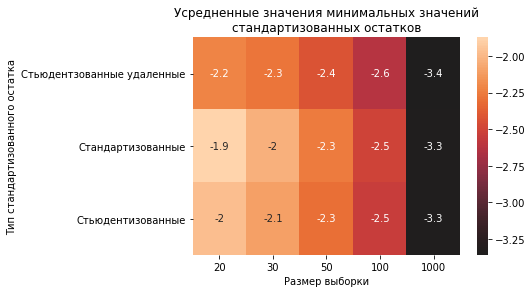

In [26]:
heatmap(min_df, center=min_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['Стьюдентзованные удаленные', 'Стандартизованные', 'Стьюдентизованные'])
plt.xlabel("Размер выборки")
plt.ylabel("Тип стандартизованного остатка")
plt.title("Усредненные значения минимальных значений\nстандартизованных остатков")

In [27]:
import matplotlib

In [28]:
matplotlib.rcParams.update({'font.size': 14})

Для базы данных с 0 % выбросов

Text(0.5, 1.0, 'Максимальные значения\nстандартизованных остатков')

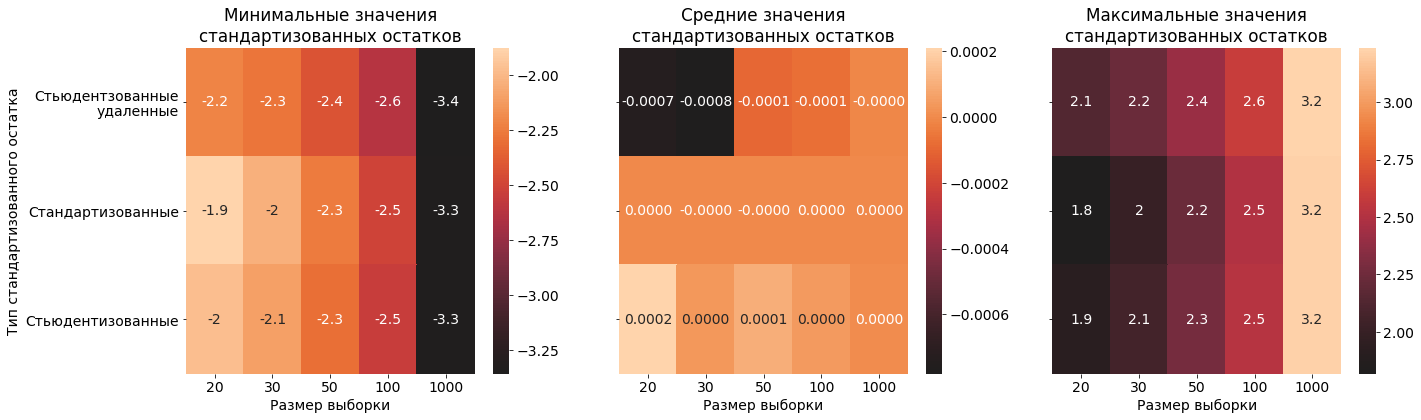

In [29]:
plt.figure(figsize=(22, 6))
plt.subplot(1, 3, 1)
heatmap(min_df, center=min_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['Стьюдентзованные\nудаленные', 'Стандартизованные', 'Стьюдентизованные'])
plt.xlabel("Размер выборки")
plt.ylabel("Тип стандартизованного остатка")
plt.title("Минимальные значения\nстандартизованных остатков")

plt.subplot(1, 3, 2)
heatmap(mead_df, center=mead_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''],
       fmt=".4f")
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Средние значения\nстандартизованных остатков")

plt.subplot(1, 3, 3)

heatmap(max_df, annot=True, center=max_df.min().min(),
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''])
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Максимальные значения\nстандартизованных остатков")

Для базы с 10% выбросов

In [30]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X_10p'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).mean()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [31]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [32]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "mean":average})

In [33]:
mead_df = pd.DataFrame(flat_data)

In [34]:
mead_df.to_excel("Redids_10_mean.xlsx")

In [35]:
mead_df = mead_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

In [36]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X_10p'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).max()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [37]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [38]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "max":average})

In [39]:
max_df = pd.DataFrame(flat_data)

In [40]:
max_df.to_excel("Redids_10_max.xlsx")

In [41]:
max_df = max_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

In [42]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X_10p'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).min()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [43]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [44]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "min":average})

In [45]:
min_df = pd.DataFrame(flat_data)
# min_df

In [46]:
min_df.to_excel("Redids_10_min.xlsx")

In [47]:
min_df = min_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

Text(0.5, 1.0, 'Максимальные значения\nстандартизованных остатков')

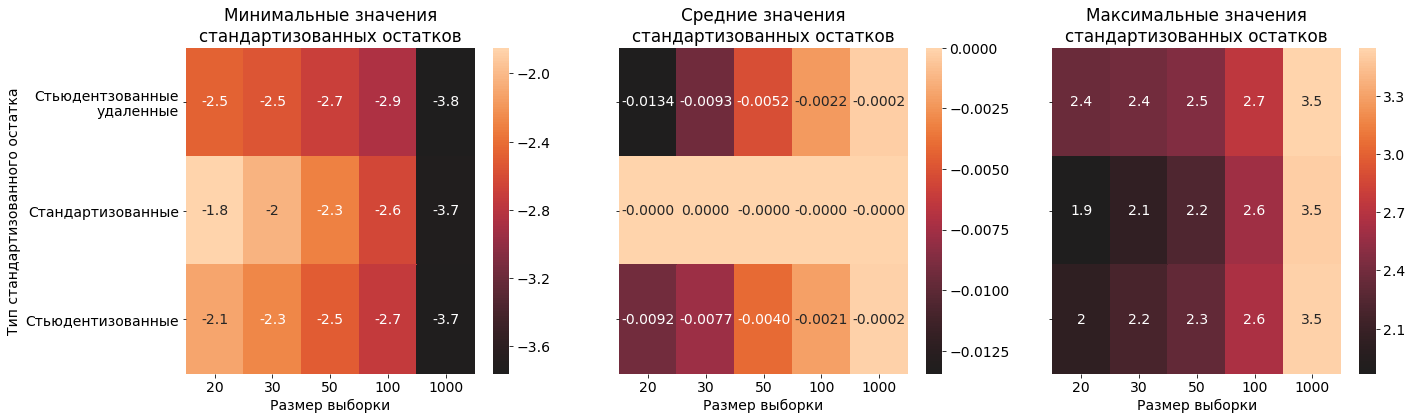

In [48]:
plt.figure(figsize=(22, 6))
plt.subplot(1, 3, 1)
heatmap(min_df, center=min_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['Стьюдентзованные\nудаленные', 'Стандартизованные', 'Стьюдентизованные'])
plt.xlabel("Размер выборки")
plt.ylabel("Тип стандартизованного остатка")
plt.title("Минимальные значения\nстандартизованных остатков")

plt.subplot(1, 3, 2)
heatmap(mead_df, center=mead_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''],
       fmt=".4f")
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Средние значения\nстандартизованных остатков")

plt.subplot(1, 3, 3)

heatmap(max_df, annot=True, center=max_df.min().min(),
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''])
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Максимальные значения\nстандартизованных остатков")

Для базы с 20% выбросов

In [49]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X_20p'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).mean()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [50]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [51]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "mean":average})

In [52]:
mead_df = pd.DataFrame(flat_data)

In [53]:
mead_df.to_excel("Redids_20_mean.xlsx")

In [54]:
mead_df = mead_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

In [55]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X_20p'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).max()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [56]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [57]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "max":average})

In [58]:
max_df = pd.DataFrame(flat_data)

In [59]:
max_df.to_excel("Redids_20_max.xlsx")

In [60]:
max_df = max_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

In [61]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X_20p'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).min()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [62]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [63]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "min":average})

In [64]:
min_df = pd.DataFrame(flat_data)
# min_df

In [65]:
min_df.to_excel("Redids_20_min.xlsx")

In [66]:
min_df = min_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

Text(0.5, 1.0, 'Максимальные значения\nстандартизованных остатков')

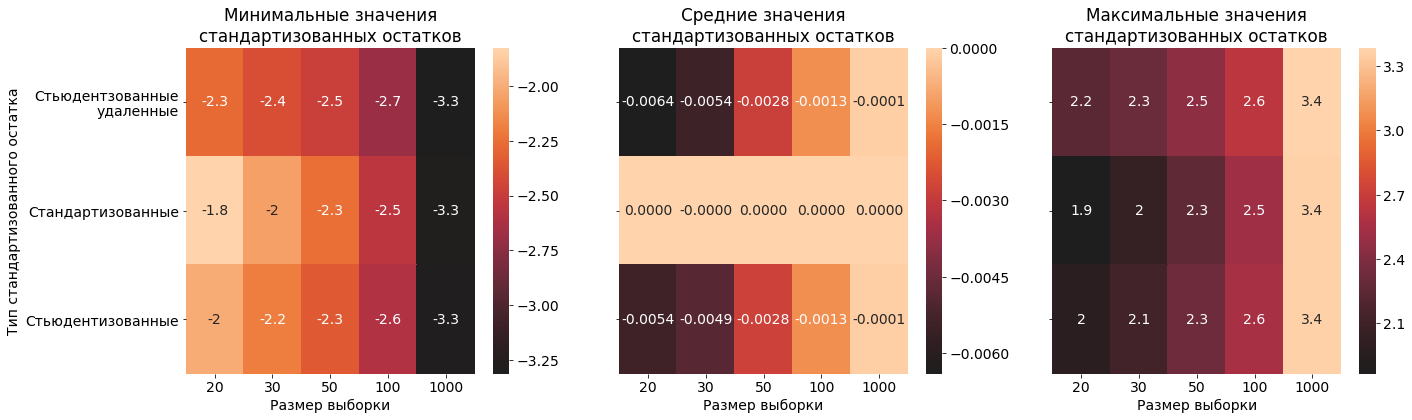

In [67]:
plt.figure(figsize=(22, 6))
plt.subplot(1, 3, 1)
heatmap(min_df, center=min_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['Стьюдентзованные\nудаленные', 'Стандартизованные', 'Стьюдентизованные'])
plt.xlabel("Размер выборки")
plt.ylabel("Тип стандартизованного остатка")
plt.title("Минимальные значения\nстандартизованных остатков")

plt.subplot(1, 3, 2)
heatmap(mead_df, center=mead_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''],
       fmt=".4f")
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Средние значения\nстандартизованных остатков")

plt.subplot(1, 3, 3)

heatmap(max_df, annot=True, center=max_df.min().min(),
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''])
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Максимальные значения\nстандартизованных остатков")

Для базы с 30% выбросов

In [68]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X_30p'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).mean()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [69]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [70]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "mean":average})

In [71]:
mead_df = pd.DataFrame(flat_data)

In [72]:
mead_df.to_excel("Redids_30_mean.xlsx")

In [73]:
mead_df = mead_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

In [74]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X_30p'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).max()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [75]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [76]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "max":average})

In [77]:
max_df = pd.DataFrame(flat_data)

In [78]:
max_df.to_excel("Redids_30_max.xlsx")

In [79]:
max_df = max_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

In [80]:
bootstrap_results = {20:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    30:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    50:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    100:{'standardized':{}, "studentized":{}, "deleted_studentized":{}},
                    1000:{'standardized':{}, "studentized":{}, "deleted_studentized":{}}} #structure

n = [20, 30, 50, 100, 1000]
n_samples = 500 

for sample_size in n: #for each sample size
    mean_dict = {'standardized':[], "studentized":[], "deleted_studentized":[]}
    for i  in range(n_samples): # repeat 500 times
        sample_ind = np.random.choice(data.index,size=sample_size, replace=True) # отбираем 20 наблюдений
        X, Y = data.loc[sample_ind]['X_30p'], data.loc[sample_ind]['Y']
        residuals = count_residuals(X, Y)
        keys = ["standardized", "studentized", "deleted_studentized"]
        for key in keys:
            mean_ = np.array(residuals[key]).min()
            mean_dict[key].append(mean_)
    bootstrap_results[sample_size]['standardized'] = mean_dict['standardized']
    bootstrap_results[sample_size]['studentized'] = mean_dict['studentized']
    bootstrap_results[sample_size]['deleted_studentized'] = mean_dict['deleted_studentized']

In [81]:
flat_data = []
n = [20, 30, 50, 100, 1000]
keys = ["standardized", "studentized", "deleted_studentized"]

In [82]:
for size in n:
    for key in keys:
        average = np.mean(bootstrap_results[size][key])
        ci = stat_intervals2(bootstrap_results[size][key], 0.9)
        flat_data.append({"size":size, "residual":key, "lower":ci[0], "upper":ci[1], "min":average})

In [83]:
min_df = pd.DataFrame(flat_data)
# min_df

In [84]:
min_df.to_excel("Redids_30_min.xlsx")

In [85]:
min_df = min_df.drop(['upper', 'lower'], axis = 1).set_index(['size', 'residual']).sort_index().unstack(level = 'size')

Text(0.5, 1.0, 'Максимальные значения\nстандартизованных остатков')

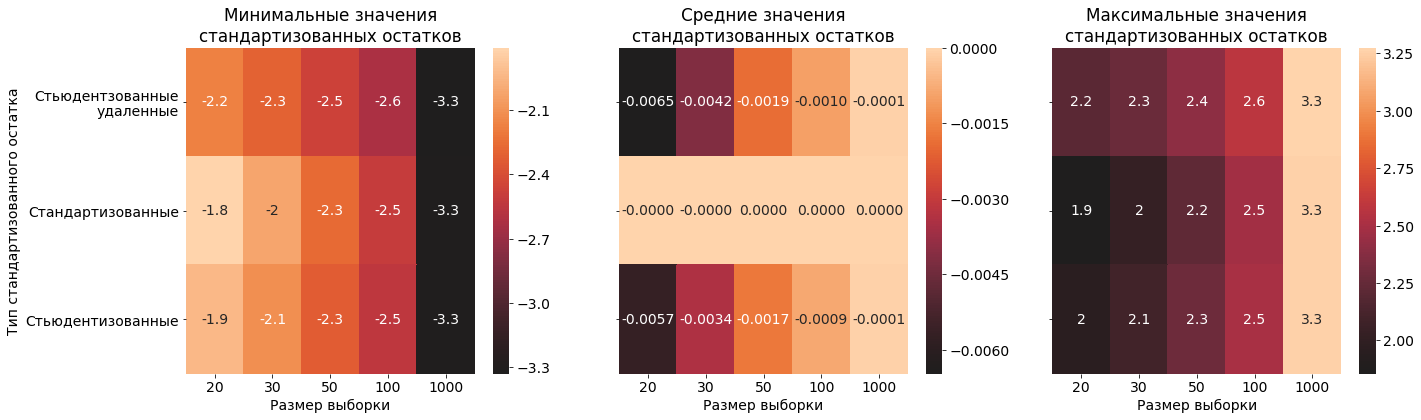

In [86]:
plt.figure(figsize=(22, 6))
plt.subplot(1, 3, 1)
heatmap(min_df, center=min_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['Стьюдентзованные\nудаленные', 'Стандартизованные', 'Стьюдентизованные'])
plt.xlabel("Размер выборки")
plt.ylabel("Тип стандартизованного остатка")
plt.title("Минимальные значения\nстандартизованных остатков")

plt.subplot(1, 3, 2)
heatmap(mead_df, center=mead_df.min().min(), annot=True,
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''],
       fmt=".4f")
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Средние значения\nстандартизованных остатков")

plt.subplot(1, 3, 3)

heatmap(max_df, annot=True, center=max_df.min().min(),
        xticklabels=[20, 30, 50, 100, 1000],
        yticklabels=['', '', ''])
plt.xlabel("Размер выборки")
plt.ylabel("")
# plt.ylabel("Тип стандартизованного остатка")
plt.title("Максимальные значения\nстандартизованных остатков")